In [67]:
import pandas
import matplotlib.pyplot as plt
import matplotlib
import datetime
import dateutil.parser

In [68]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

In [78]:
data1 = pandas.read_json("onemeter.json")
data2 = pandas.read_json("twometre.json")
data3 = pandas.read_json("threemetre.json")
data4 = pandas.read_json("fourmetre.json")

In [79]:
data4.head()

,agentId,major,minor,rssi,time,tx,uuid
0,RPi four metre,5,5,-57,2016-07-12T03:12:23.861045,-58,d0d3fa86ca7645ec9bd96af400000005
1,RPi four metre,5,5,-57,2016-07-12T03:12:25.765122,-58,d0d3fa86ca7645ec9bd96af400000005
2,RPi four metre,5,5,-86,2016-07-12T03:12:26.718932,-58,d0d3fa86ca7645ec9bd96af400000005
3,RPi four metre,5,5,-57,2016-07-12T03:12:27.669189,-58,d0d3fa86ca7645ec9bd96af400000005
4,RPi four metre,5,5,-75,2016-07-12T03:12:29.578506,-58,d0d3fa86ca7645ec9bd96af400000005


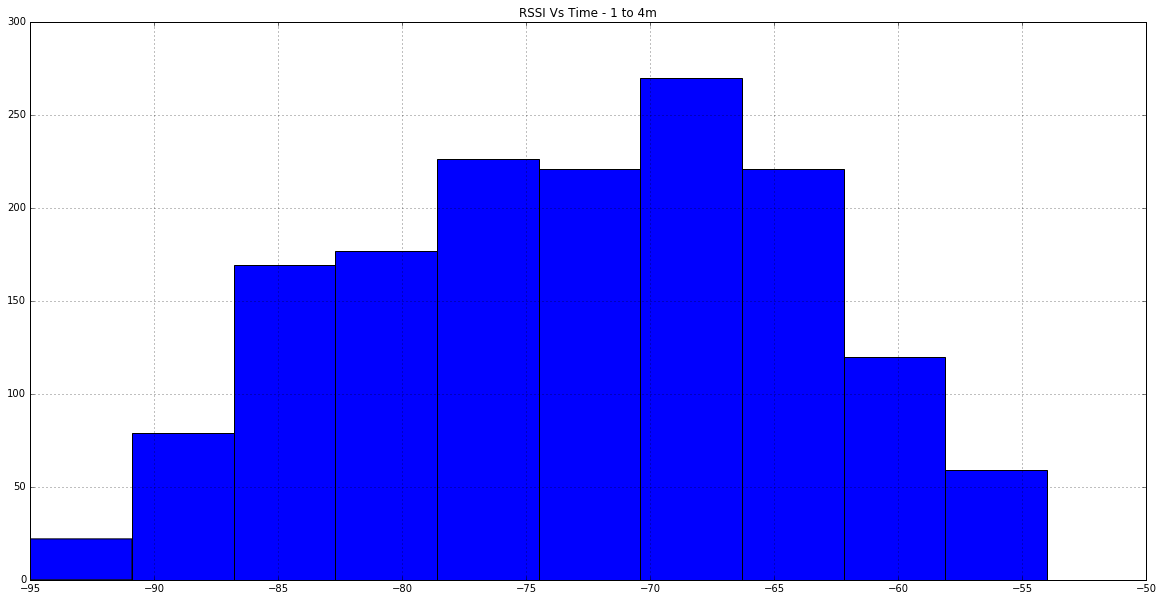

In [80]:
data1.rssi.hist()
plt.title('RSSI Vs Time - 1 to 4m')

In [81]:
def convert_timestring(row):
    return dateutil.parser.parse(row.time)


data4["timestamp"] = data4.apply (lambda row: convert_timestring(row), axis=1)
data3["timestamp"] = data3.apply (lambda row: convert_timestring(row), axis=1)
data2["timestamp"] = data2.apply (lambda row: convert_timestring(row), axis=1)
data1["timestamp"] = data1.apply (lambda row: convert_timestring(row), axis=1)

In [82]:
testRow = data3.iloc[[2]]
testRow

,agentId,major,minor,rssi,time,tx,uuid,timestamp
2,RPi three metre,5,5,-86,2016-07-12T03:12:27.529621,-58,d0d3fa86ca7645ec9bd96af400000005,2016-07-12 03:12:27.529621


In [83]:
print testRow.timestamp
print testRow.timestamp + datetime.timedelta(minutes=1)

2   2016-07-12 03:12:27.529621
Name: timestamp, dtype: datetime64[ns]
2   2016-07-12 03:13:27.529621
Name: timestamp, dtype: datetime64[ns]


In [84]:
def addTime(row, timeoffset):
    return row.timestamp + datetime.timedelta(minutes=timeoffset)

data1["rotated_time"] = data1.apply (lambda row: addTime(row, 2), axis=1)
data2["rotated_time"] = data2.apply (lambda row: addTime(row, 1), axis=1)
data3["rotated_time"] = data3.apply (lambda row: addTime(row, 0), axis=1)
data4["rotated_time"] = data4.apply (lambda row: addTime(row, 3), axis=1)

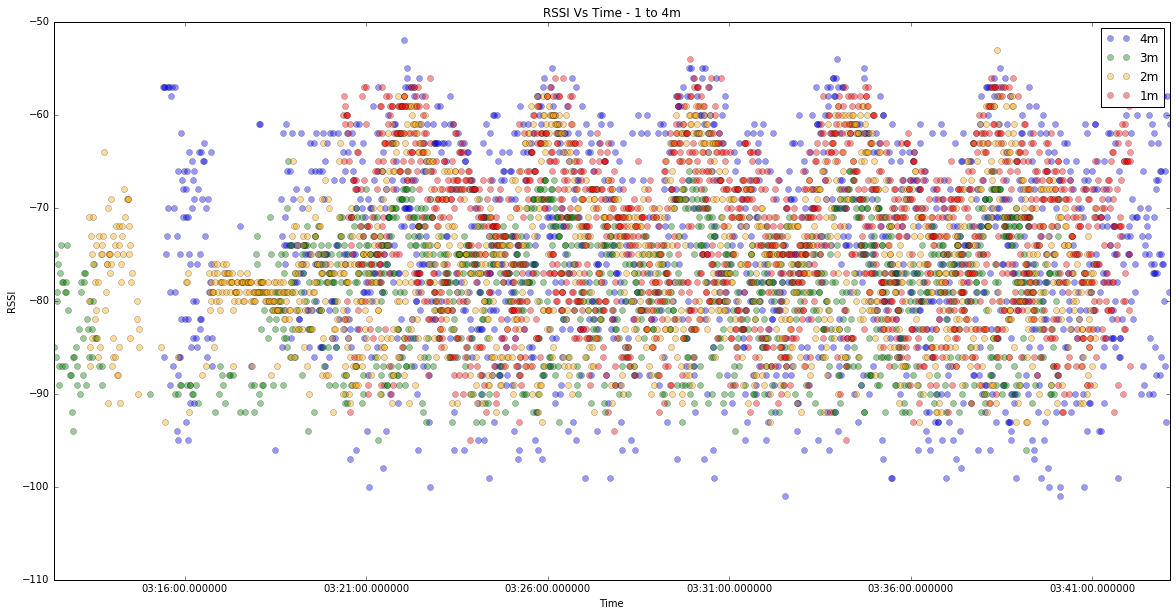

In [137]:
plt.plot_date(data4.rotated_time, data4.rssi, label='4m', alpha=0.4)
plt.plot_date(data3.rotated_time, data3.rssi, label='3m', alpha=0.4)
plt.plot_date(data2.rotated_time, data2.rssi, color='orange', label='2m', alpha=0.4)
plt.plot_date(data1.rotated_time, data1.rssi, color='red', label='1m', alpha=0.4)
plt.legend()
plt.xlabel('Time')
plt.ylabel('RSSI')
plt.title('RSSI Vs Time - 1 to 4m')
plt.show()

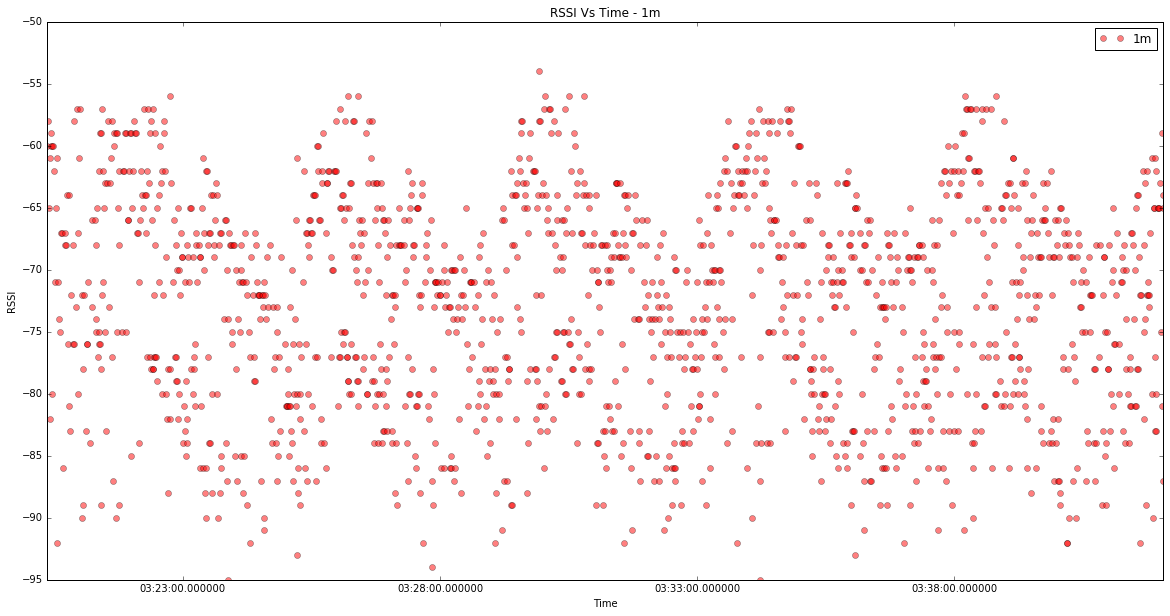

In [120]:
plt.plot_date(data1.rotated_time, data1.rssi, color='red', label='1m',  alpha=0.5)
plt.legend()
plt.xlabel('Time')
plt.ylabel('RSSI')
plt.title('RSSI Vs Time - 1m')
plt.show()

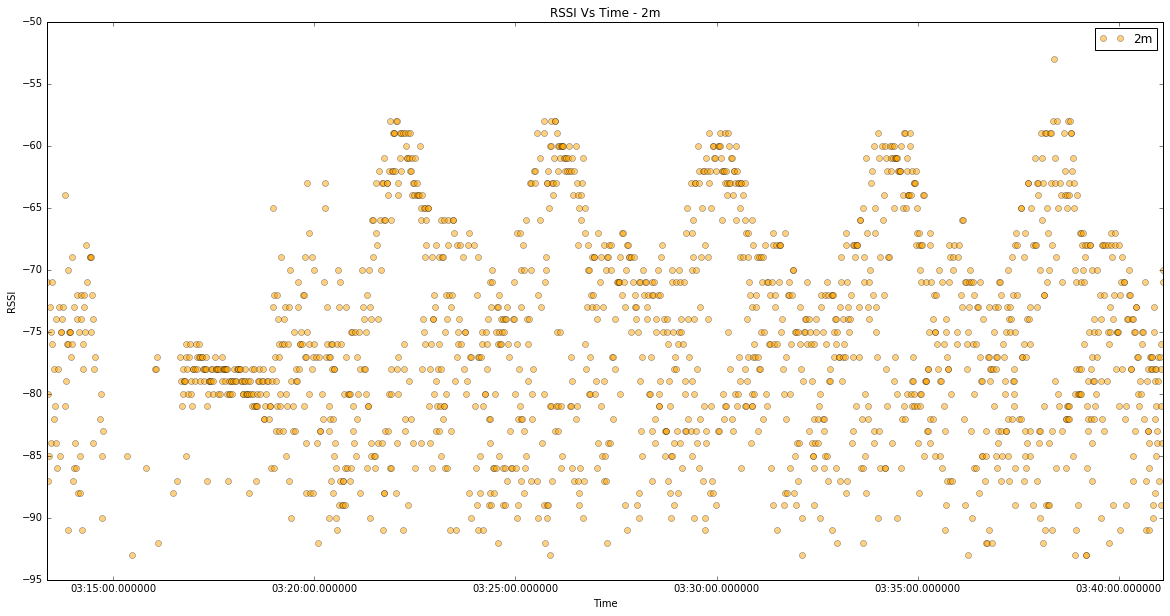

In [121]:
plt.plot_date(data2.rotated_time, data2.rssi, color='orange', label='2m', alpha=0.5)
plt.legend()
plt.xlabel('Time')
plt.ylabel('RSSI')
plt.title('RSSI Vs Time - 2m')
plt.show()

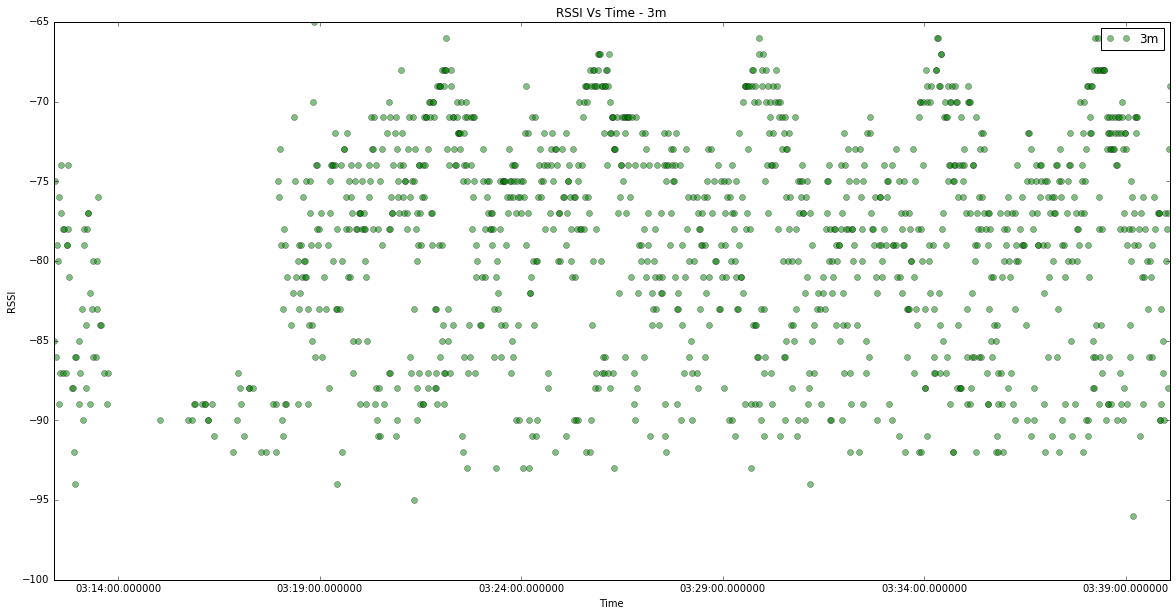

In [122]:
plt.plot_date(data3.rotated_time, data3.rssi, color='green', label='3m', alpha=0.5)
plt.legend()
plt.xlabel('Time')
plt.ylabel('RSSI')
plt.title('RSSI Vs Time - 3m')
plt.show()

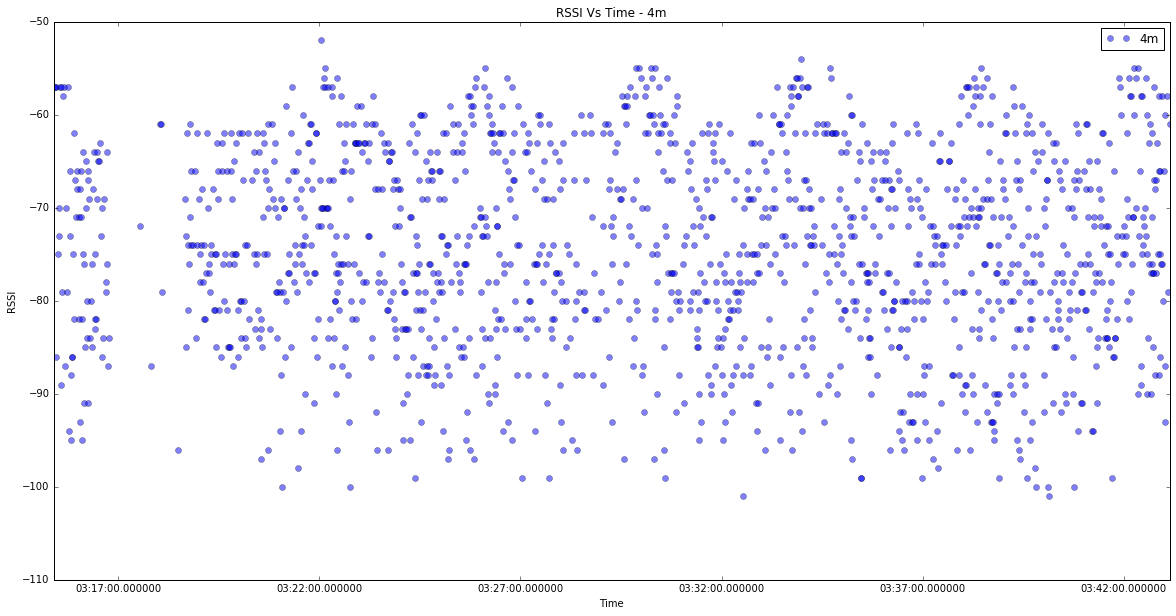

In [123]:
plt.plot_date(data4.rotated_time, data4.rssi, color='blue', label='4m', alpha=0.5)
plt.legend()
plt.xlabel('Time')
plt.ylabel('RSSI')
plt.title('RSSI Vs Time - 4m')
plt.show()

In [60]:
#create unique list of names
uniqueNames1 = data1.major.unique()
uniqueNames2 = data2.major.unique()
uniqueNames3 = data3.major.unique()
uniqueNames4 = data4.major.unique()

#create a data frame dictionary to store your data frames
DataFrameDict1 = {elem : pandas.DataFrame for elem in uniqueNames1}
DataFrameDict2 = {elem : pandas.DataFrame for elem in uniqueNames2}
DataFrameDict3 = {elem : pandas.DataFrame for elem in uniqueNames3}
DataFrameDict4 = {elem : pandas.DataFrame for elem in uniqueNames4}

for key in DataFrameDict.keys():
    DataFrameDict1[key] = data1[:][data1.major == key] 
    DataFrameDict2[key] = data2[:][data2.major == key] 
    DataFrameDict3[key] = data3[:][data3.major == key] 
    DataFrameDict4[key] = data4[:][data4.major == key] 
    
#print uniqueNames
#print DataFrameDict[5].shape
#print DataFrameDict[9752].shape

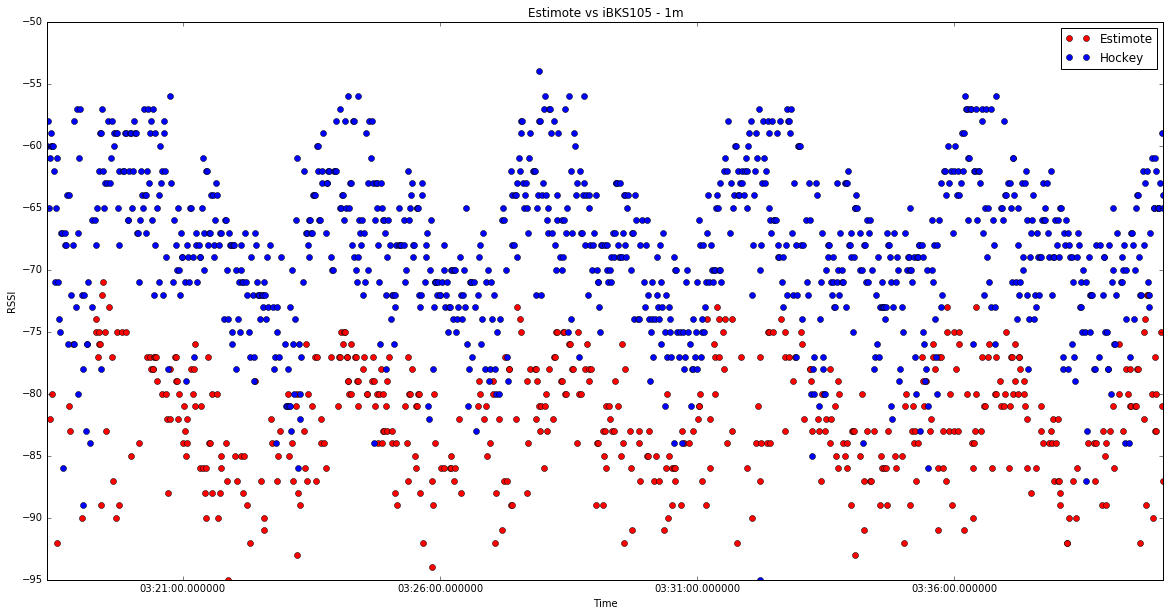

In [125]:
hockey = DataFrameDict1[5]
estimote = DataFrameDict1[9752]
plt.plot_date(estimote.timestamp, estimote.rssi, color='red', label='Estimote')
plt.plot_date(hockey.timestamp, hockey.rssi, color='blue', label='Hockey')
plt.xlabel('Time')
plt.ylabel('RSSI')
plt.title('Estimote vs iBKS105 - 1m')
plt.legend()
plt.show()

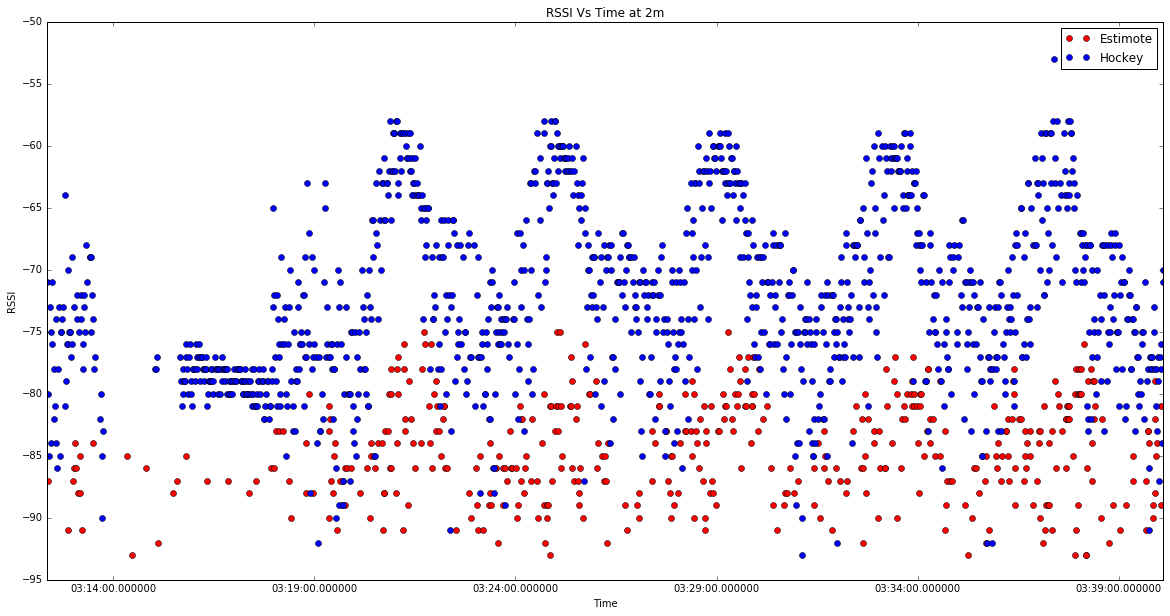

In [127]:
hockey = DataFrameDict2[5]
estimote = DataFrameDict2[9752]
plt.plot_date(estimote.timestamp, estimote.rssi, color='red', label='Estimote')
plt.plot_date(hockey.timestamp, hockey.rssi, label='Hockey')
plt.xlabel('Time')
plt.ylabel('RSSI')
plt.title('RSSI Vs Time at 2m')
plt.legend()
plt.show()

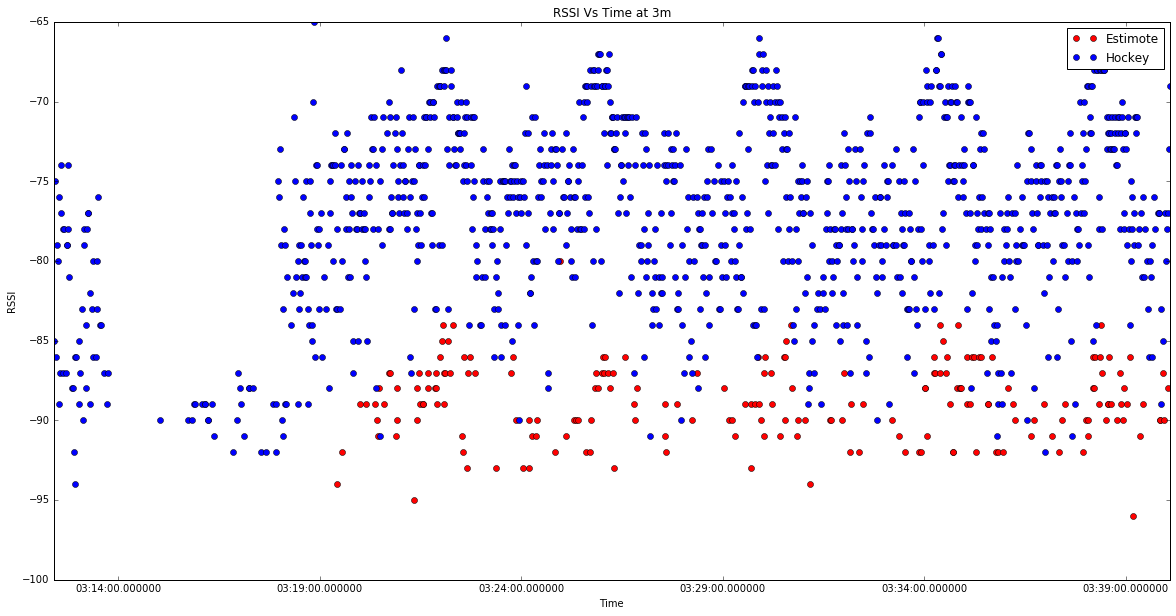

In [128]:
hockey = DataFrameDict3[5]
estimote = DataFrameDict3[9752]
plt.plot_date(estimote.timestamp, estimote.rssi, color='red', label='Estimote')
plt.plot_date(hockey.timestamp, hockey.rssi, label='Hockey')
plt.xlabel('Time')
plt.ylabel('RSSI')
plt.title('RSSI Vs Time at 3m')
plt.legend()
plt.show()

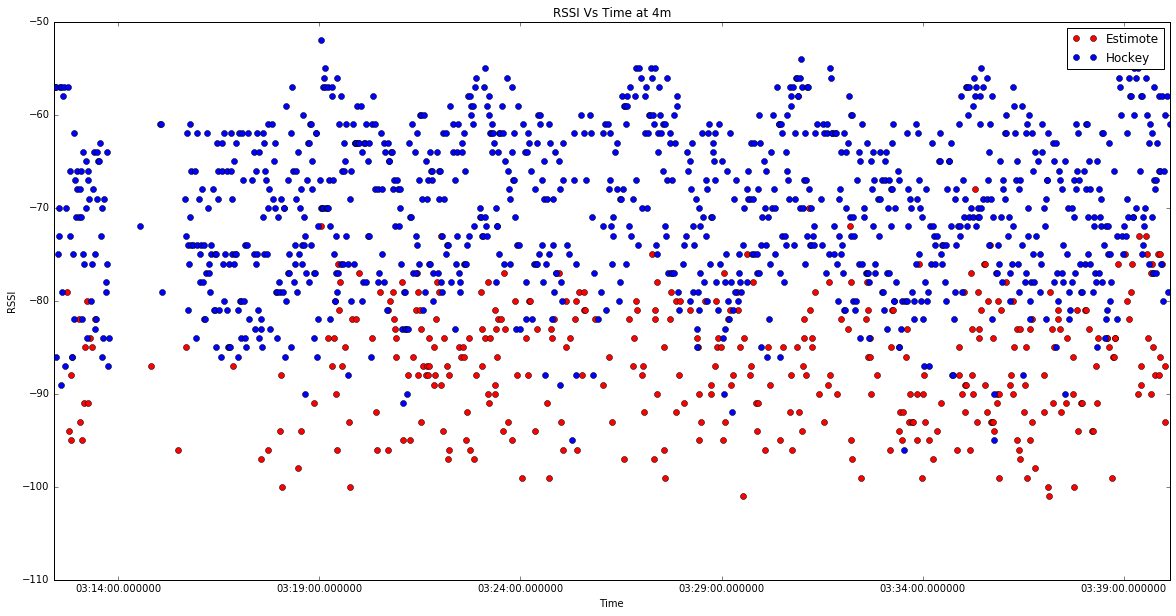

In [129]:
hockey = DataFrameDict4[5]
estimote = DataFrameDict4[9752]
plt.plot_date(estimote.timestamp, estimote.rssi, color='red', label='Estimote')
plt.plot_date(hockey.timestamp, hockey.rssi, label='Hockey')
plt.xlabel('Time')
plt.ylabel('RSSI')
plt.title('RSSI Vs Time at 4m')
plt.legend()
plt.show()